In [1]:
# Package imports
import pandas as pd
import numpy as np
import pickle
from scipy import sparse
import matplotlib.pyplot as plt
import seaborn as sns 

### Loading Data

In [2]:
dmv_beers = pd.read_csv('../data/dmv_beer_full_database.csv')

with open('../data/beer_to_location.pickle', 'rb') as f:
    beer_location_dict = pickle.load(f)

## EDA - Data Viz!

### Beer Counts by State

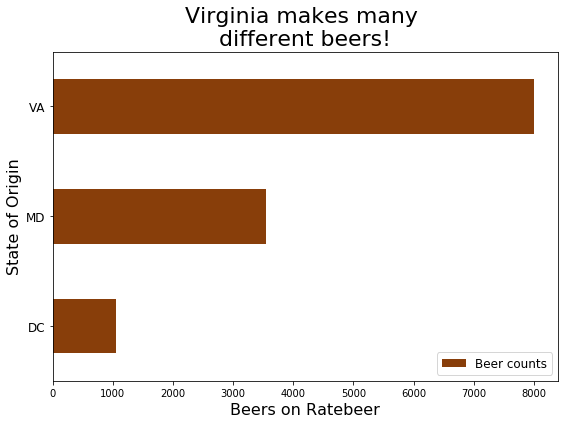

In [3]:
# Beers by State
dmv_beers.groupby('state')['name'].count().plot(kind='barh', color='#883E0A', figsize=(8,6))
plt.legend(loc=0, fontsize=12, labels=['Beer counts'])
plt.title('Virginia makes many \ndifferent beers!', size=22)
plt.xlabel('Beers on Ratebeer', fontsize = 16)
plt.ylabel('State of Origin', fontsize = 16)
plt.xticks(size=10, rotation=0)
plt.yticks(size=12)
plt.tight_layout();

But what about per capita?

In [4]:
# Population estimates from Census as of July 1, 2018
# https://www.census.gov/newsroom/press-kits/2018/pop-estimates-national-state.html
dc_pop = 702_455
va_pop = 8_517_685
md_pop = 6_042_718

In [5]:
dc_beer_percap = dmv_beers.groupby('state')['name'].count()['DC'] / dc_pop
va_beer_percap = dmv_beers.groupby('state')['name'].count()['VA'] / va_pop
md_beer_percap = dmv_beers.groupby('state')['name'].count()['MD'] / md_pop

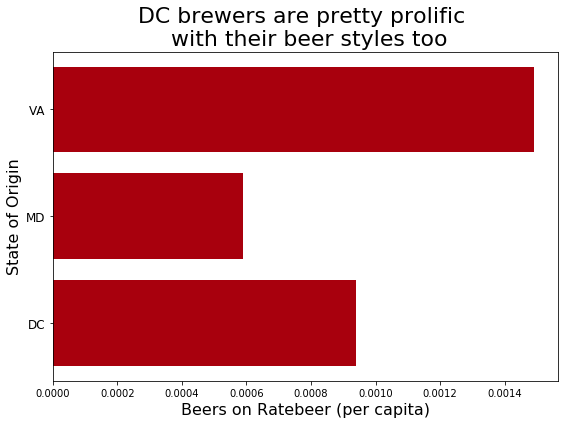

In [6]:
plt.figure(figsize=(8,6))
plt.barh(y=['DC','MD','VA'], width=[va_beer_percap, md_beer_percap, dc_beer_percap], color='#A8000D')
# plt.legend(loc=0, fontsize=12)
plt.title('DC brewers are pretty prolific \n with their beer styles too', size=22)
plt.xlabel('Beers on Ratebeer (per capita)', fontsize = 16)
plt.ylabel('State of Origin', fontsize = 16)
plt.xticks(size=10, rotation=0)
plt.yticks(size=12)
plt.tight_layout();

### Alcohol Content Analysis

In [7]:
def abv_mapper(abv):
    '''
    Function for mapping abv values
    to categorical ranges
    '''
    if abv < 0.04:
        return '4% and less'
    elif abv < 0.05:
        return '4-5%'
    elif abv < 0.06:
        return '5-6%'
    elif abv < 0.07:
        return '6-7%'
    elif abv < 0.08:
        return '7-8%'
    else:
        return '8% and more'

In [8]:
# Apply mapping function for abv
dmv_beers['abv_range'] = dmv_beers['abv'].apply(abv_mapper)

In [9]:
# Groupby ABV category
dmv_beers.groupby('abv_range')['rating'].agg(['mean', 'count','min','max'])

,mean,count,min,max
abv_range,,,,
4% and less,3.096775,307,2.18,3.79
4-5%,3.079109,1650,2.23,3.77
5-6%,3.080410,3070,2.26,4.03
6-7%,3.131047,2483,2.43,3.84
7-8%,3.154714,1763,2.54,3.84
8% and more,3.250998,3328,2.45,4.07


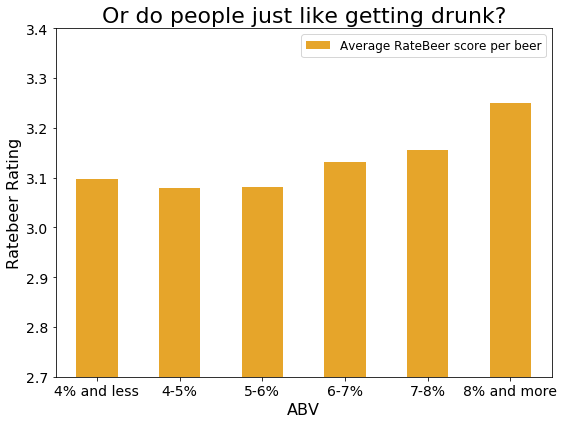

In [10]:
# Plotting average rating by ABV category
dmv_beers.groupby('abv_range')['rating'].agg(['mean']).plot(kind='bar',figsize=(8,6), color='#E6A52A');
plt.legend(loc=0, fontsize=12, labels=['Average RateBeer score per beer'])
plt.ylim(top=3.4, bottom=2.7)
plt.title('Or do people just like getting drunk?', size=22)
plt.xlabel('ABV', fontsize = 16)
plt.ylabel('Ratebeer Rating', fontsize = 16)
plt.xticks(size=14, rotation=0)
plt.yticks(size=14)
plt.tight_layout();

### Beer Styles?

In [11]:
# Hardcoded category dictionary looking at 2015 BJCP style guide
beercategory_dict = pd.read_csv('/Users/willkarnasiewicz/beerstyles.csv').set_index('Style').T.to_dict();

In [12]:
# Add new column for category, broader than current style column
dmv_beers['category'] = dmv_beers['style'].map(lambda x: beercategory_dict[x]['category'])

In [13]:
# Numerical counts
dmv_beers.groupby('category')['name'].count().sort_values(ascending=False)

category
IPA               2953
Porter / Stout    1938
Sour              1184
Strong Ale        1024
Pale Ale          1019
Farmhouse Ale      750
Specialty          735
Pale Lager         577
Ale                529
Wheat              456
Amber Ale          322
Red Ale            303
NEIPA              290
Lager              272
Dark Lager         105
Other Lager        101
Fruit               31
Mead                 7
Cider                5
Name: name, dtype: int64

In [14]:
dmv_beers['category'].value_counts(normalize=True)

IPA               0.234346
Porter / Stout    0.153797
Sour              0.093961
Strong Ale        0.081263
Pale Ale          0.080867
Farmhouse Ale     0.059519
Specialty         0.058329
Pale Lager        0.045790
Ale               0.041981
Wheat             0.036188
Amber Ale         0.025554
Red Ale           0.024046
NEIPA             0.023014
Lager             0.021586
Dark Lager        0.008333
Other Lager       0.008015
Fruit             0.002460
Mead              0.000556
Cider             0.000397
Name: category, dtype: float64

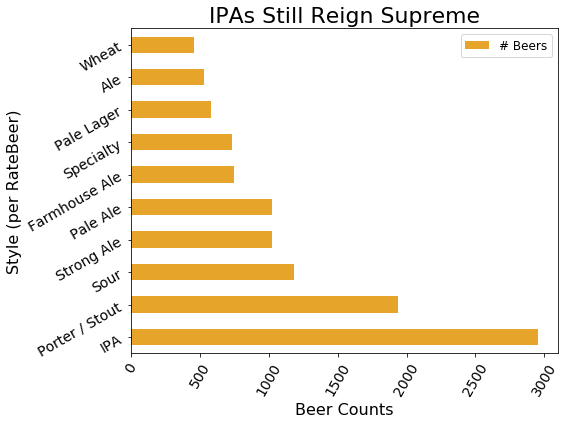

In [15]:
# Plotting count by style category
dmv_beers.groupby('category')['name'].count().sort_values(ascending=False).head(10).plot(kind='barh',figsize=(8,6), color='#E6A52A');
plt.legend(loc=0, fontsize=12, labels=['# Beers'])
plt.title('IPAs Still Reign Supreme', size=22)
plt.xlabel('Beer Counts', fontsize = 16)
plt.ylabel('Style (per RateBeer)', fontsize = 16)
plt.xticks(size=14, rotation=60)
plt.yticks(size=14, rotation=30)
plt.tight_layout();

In [16]:
dmv_beers.groupby('category')['rating'].mean().sort_values(ascending=False).head(10)

category
NEIPA             3.272138
Porter / Stout    3.222564
IPA               3.214697
Sour              3.202188
Strong Ale        3.158633
Farmhouse Ale     3.117053
Lager             3.085551
Dark Lager        3.076762
Amber Ale         3.061180
Pale Ale          3.058135
Name: rating, dtype: float64

In [17]:
total_avg_rating = dmv_beers['rating'].mean()

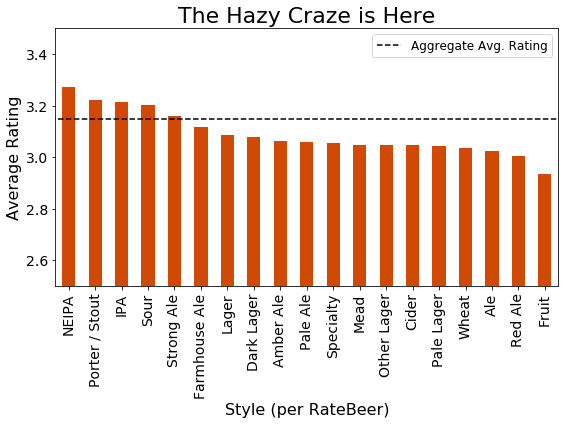

In [18]:
# Plotting count by style category
dmv_beers.groupby('category')['rating'].mean().sort_values(ascending=False).plot(kind='bar',
                                                                                         figsize=(8,6), 
                                                                                         color='#D04A05')
plt.hlines(y=total_avg_rating, xmin=-1, xmax=30, linestyles='dashed')
plt.legend(loc=0, fontsize=12, labels=['Aggregate Avg. Rating'])
plt.ylim(bottom=2.5, top=3.5)
plt.title('The Hazy Craze is Here', size=22)
plt.ylabel('Average Rating', fontsize = 16)
plt.xlabel('Style (per RateBeer)', fontsize = 16)
plt.yticks(size=14, rotation=0)
plt.xticks(size=14, rotation=90)
plt.tight_layout();

In [19]:
dmv_beers['year_added'] = dmv_beers['date_added'].map(lambda x: str(x)[-4:])

In [20]:
dmv_beers['year_added'].value_counts()

2018    2381
2017    2317
2016    1879
2015    1564
2014    1296
2013     860
2019     725
2012     430
2011     266
2010     194
2009     164
2003     102
2004      81
2008      78
2005      59
2002      54
2006      53
2007      51
2000      32
2001      15
Name: year_added, dtype: int64

In [21]:
# NEIPA are trending!
dmv_beers[dmv_beers['category']=='NEIPA']['year_added'].value_counts(normalize=True)

2018    0.382759
2019    0.372414
2016    0.113793
2017    0.113793
2015    0.010345
2011    0.003448
2014    0.003448
Name: year_added, dtype: float64

### Additional cleaning for ale vs not ale?

In [22]:
dmv_beers['ale'] = dmv_beers['category'].replace({'IPA': 1,
                                                  'Strong Ale': 1,
                                                  'Pale Ale': 1,
                                                  'Farmhouse Ale': 1,
                                                  'Ale': 1,
                                                  'Amber Ale': 1,
                                                  'Red Ale': 1,
                                                  'NEIPA': 1})

In [23]:
dmv_beers['ale'] = dmv_beers['ale'].map(lambda x: 0 if x != 1 else x)

In [24]:
dmv_beers.head()

,abv,address,brewery,country,date_added,google_map_link,link,name,num_ratings,postal_code,rating,state,style,town,abv_range,category,year_added,ale
0,0.083,"6400 Chillum Pl, NW",3 Stars Brewing Company,USA,6/3/2016,maps.google.com/maps?f=q&hl=en&geocode=&q=3+St...,www.ratebeer.com/beer/3-stars-ultrafresh/423469/,3 Stars #ultrafresh,14,20011,3.47,DC,IIPA - Imperial / Double IPA,Washington,8% and more,IPA,2016,1
1,0.067,"6400 Chillum Pl, NW",3 Stars Brewing Company,USA,10/6/2018,maps.google.com/maps?f=q&hl=en&geocode=&q=3+St...,www.ratebeer.com/beer/3-stars-bout-that-life/6...,3 Stars 'Bout That Life,3,20011,3.18,DC,Sour / Wild Beer,Washington,6-7%,Sour,2018,0
2,0.055,"6400 Chillum Pl, NW",3 Stars Brewing Company,USA,4/17/2017,maps.google.com/maps?f=q&hl=en&geocode=&q=3+St...,www.ratebeer.com/beer/3-stars-aslin-flip-the-s...,3 Stars / Aslin Flip the Script,5,20011,3.20,DC,Sour / Wild Beer,Washington,5-6%,Sour,2017,0
3,0.072,"6400 Chillum Pl, NW",3 Stars Brewing Company,USA,5/13/2018,maps.google.com/maps?f=q&hl=en&geocode=&q=3+St...,www.ratebeer.com/beer/3-stars-captain-lawrence...,3 Stars / Captain Lawrence 77's and Bonnevilles,3,20011,3.21,DC,IIPA - Imperial / Double IPA,Washington,7-8%,IPA,2018,1
4,0.065,"6400 Chillum Pl, NW",3 Stars Brewing Company,USA,9/18/2016,maps.google.com/maps?f=q&hl=en&geocode=&q=3+St...,www.ratebeer.com/beer/3-stars-charm-city-two-h...,3 Stars / Charm City Two Headed Unicorn,9,20011,3.44,DC,Sour / Wild Beer,Washington,6-7%,Sour,2016,0


In [25]:
# Check class balance
dmv_beers['ale'].value_counts(normalize=True)

1    0.57059
0    0.42941
Name: ale, dtype: float64

In [26]:
dmv_beers.to_csv('../data/dmv_beer_database_extra_categories.csv', index=False)

In [27]:
dmv_beers.drop(columns=['address','country','google_map_link','link','postal_code'], inplace=True)

In [28]:
dmv_beers.to_csv('../data/dmv_beer_database_no_address.csv', index=False)